<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [8]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Step 1: Load the dataset


In [9]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




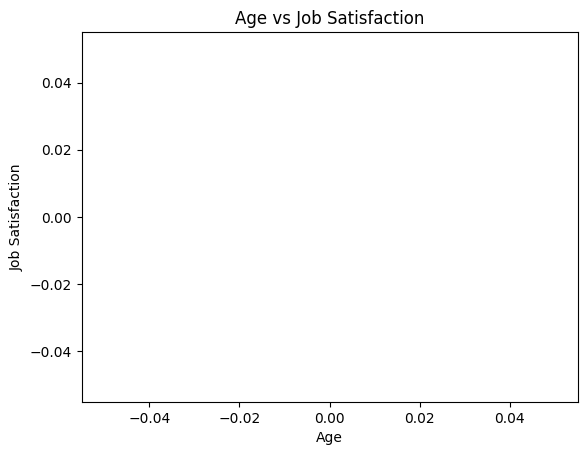

In [10]:
## Write your code here
df_age = df[["Age", "JobSatPoints_6"]].dropna()
df_age["Age"] = pd.to_numeric(df_age["Age"], errors="coerce")
plt.scatter(df_age["Age"], df_age["JobSatPoints_6"], alpha=0.4)
plt.title("Age vs Job Satisfaction")
plt.xlabel("Age")
plt.ylabel("Job Satisfaction")
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


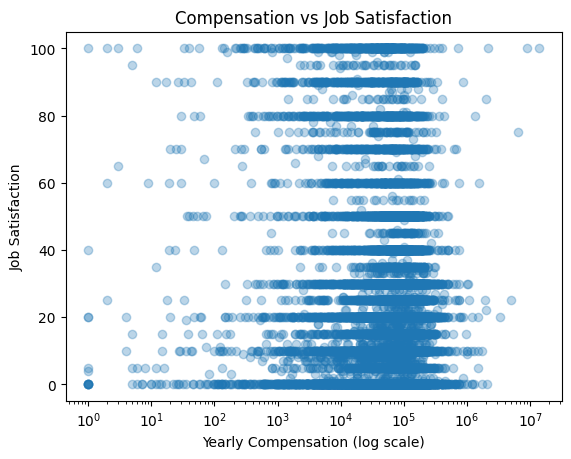

In [11]:
## Write your code here
df_comp = df[["ConvertedCompYearly", "JobSatPoints_6"]].dropna()
df_comp["ConvertedCompYearly"] = pd.to_numeric(df_comp["ConvertedCompYearly"], errors="coerce")
plt.scatter(df_comp["ConvertedCompYearly"], df_comp["JobSatPoints_6"], alpha=0.3)
plt.xscale("log")
plt.title("Compensation vs Job Satisfaction")
plt.xlabel("Yearly Compensation (log scale)")
plt.ylabel("Job Satisfaction")
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


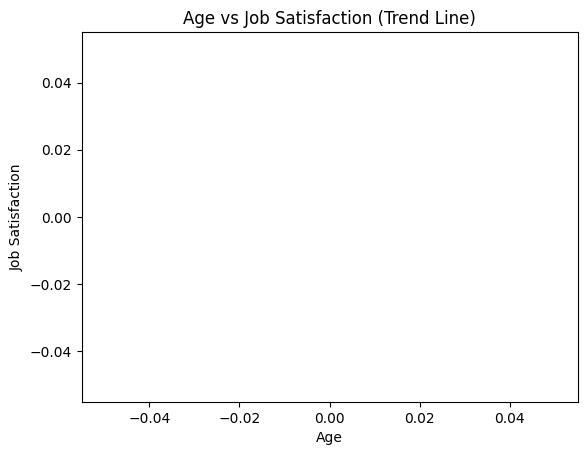

In [13]:
## Write your code here
df_age = df[["Age", "JobSatPoints_6"]].copy()
df_age["Age"] = pd.to_numeric(df_age["Age"], errors="coerce")
df_age["JobSatPoints_6"] = pd.to_numeric(df_age["JobSatPoints_6"], errors="coerce")


df_age = df_age.replace([np.inf, -np.inf], np.nan).dropna()


plt.scatter(df_age["Age"], df_age["JobSatPoints_6"], alpha=0.3)

if len(df_age) > 1:  # only fit if data exists
    m, b = np.polyfit(df_age["Age"], df_age["JobSatPoints_6"], 1)
    plt.plot(df_age["Age"], m*df_age["Age"]+b, color="red")

plt.title("Age vs Job Satisfaction (Trend Line)")
plt.xlabel("Age")
plt.ylabel("Job Satisfaction")
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


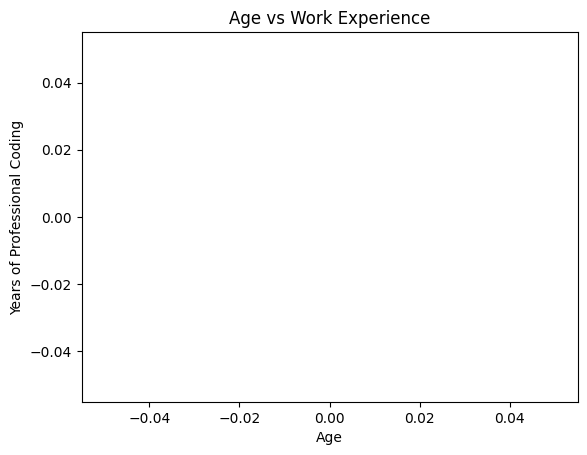

In [14]:
## Write your code here
df_exp = df[["Age", "YearsCodePro"]].dropna()
df_exp["Age"] = pd.to_numeric(df_exp["Age"], errors="coerce")
df_exp["YearsCodePro"] = pd.to_numeric(df_exp["YearsCodePro"], errors="coerce")
plt.scatter(df_exp["Age"], df_exp["YearsCodePro"], alpha=0.4)
plt.title("Age vs Work Experience")
plt.xlabel("Age")
plt.ylabel("Years of Professional Coding")
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


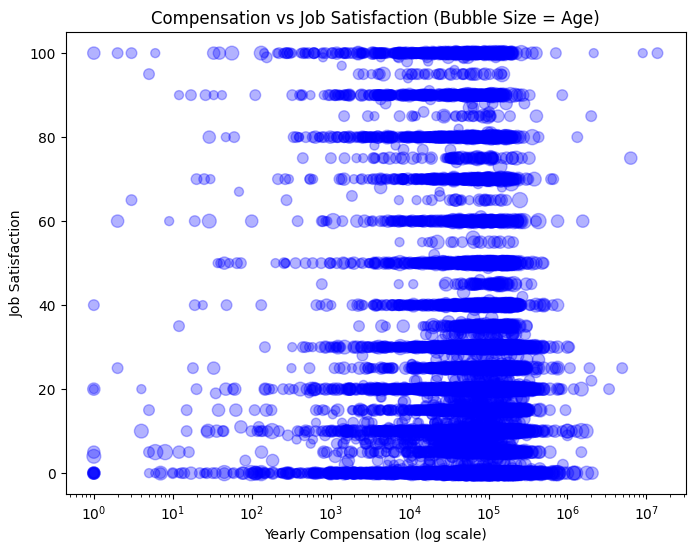

In [17]:
## Write your code here


df_bubble = df[["ConvertedCompYearly", "JobSatPoints_6", "Age"]].copy()


df_bubble["ConvertedCompYearly"] = pd.to_numeric(df_bubble["ConvertedCompYearly"], errors="coerce")


df_bubble["JobSatPoints_6"] = pd.to_numeric(df_bubble["JobSatPoints_6"], errors="coerce")


def parse_age(val):
    if isinstance(val, str):
        if "-" in val: 
            nums = [int(x) for x in val.split()[0].split("-")]
            return sum(nums) / len(nums)
        elif "Under" in val:
            return 17
        elif "65" in val:
            return 65
        elif val.isdigit():
            return int(val)
    return pd.to_numeric(val, errors="coerce")

df_bubble["Age"] = df_bubble["Age"].apply(parse_age)

# Drop rows with any missing values
df_bubble = df_bubble.dropna()

# Ensure correct dtypes
df_bubble = df_bubble.astype({
    "ConvertedCompYearly": "float",
    "JobSatPoints_6": "float",
    "Age": "float"
})

plt.figure(figsize=(8,6))
plt.scatter(
    df_bubble["ConvertedCompYearly"],
    df_bubble["JobSatPoints_6"],
    s=df_bubble["Age"] * 2,   # scale bubble size for visibility
    alpha=0.3,
    c="blue"
)
plt.xscale("log")
plt.title("Compensation vs Job Satisfaction (Bubble Size = Age)")
plt.xlabel("Yearly Compensation (log scale)")
plt.ylabel("Job Satisfaction")
plt.show()

    

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


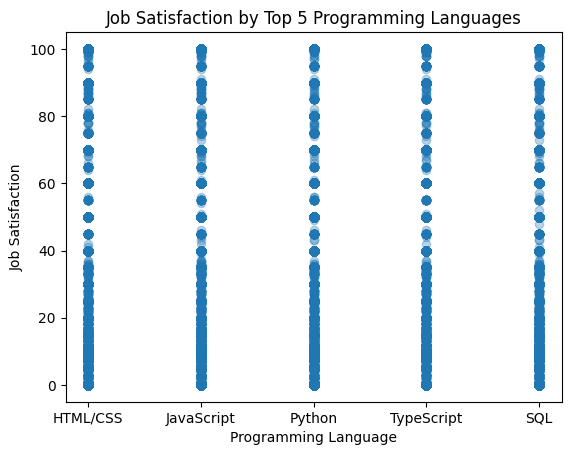

In [18]:
## Write your code here

df_lang = df[["LanguageHaveWorkedWith", "JobSatPoints_6"]].dropna()
df_lang = df_lang.assign(Language=df_lang["LanguageHaveWorkedWith"].str.split(";")).explode("Language")

top5 = df_lang["Language"].value_counts().head(5).index
df_lang_top5 = df_lang[df_lang["Language"].isin(top5)]

plt.scatter(df_lang_top5["Language"], df_lang_top5["JobSatPoints_6"], alpha=0.3)
plt.title("Job Satisfaction by Top 5 Programming Languages")
plt.xlabel("Programming Language")
plt.ylabel("Job Satisfaction")
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


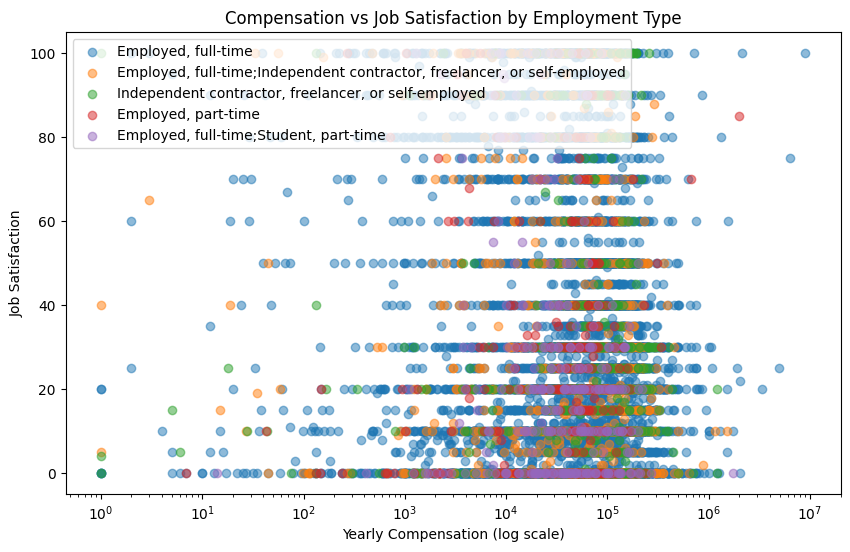

In [19]:
## Write your code here

df_emp = df[["ConvertedCompYearly", "JobSatPoints_6", "Employment"]].dropna()


df_emp["ConvertedCompYearly"] = pd.to_numeric(df_emp["ConvertedCompYearly"], errors="coerce")
df_emp["JobSatPoints_6"] = pd.to_numeric(df_emp["JobSatPoints_6"], errors="coerce")


top_emp = df_emp["Employment"].value_counts().head(5).index
df_emp = df_emp[df_emp["Employment"].isin(top_emp)]


plt.figure(figsize=(10,6))
for emp in top_emp:
    subset = df_emp[df_emp["Employment"] == emp]
    plt.scatter(subset["ConvertedCompYearly"], subset["JobSatPoints_6"], 
                label=emp, alpha=0.5)

plt.xscale("log")
plt.title("Compensation vs Job Satisfaction by Employment Type")
plt.xlabel("Yearly Compensation (log scale)")
plt.ylabel("Job Satisfaction")
plt.legend()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
## Write your code here
## Scatter Plot for Work Experience vs. Age Group by Country

# Helper function from earlier to convert Age to numeric
def parse_age(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, str):
        val = val.strip()
        if "-" in val:
            try:
                nums = [int(x) for x in val.split()[0].split("-")]
                return sum(nums)/len(nums)
            except:
                return np.nan
        if "Under" in val: return 17
        if "65" in val: return 65
        if "Prefer" in val: return np.nan
        if val.isdigit(): return float(val)
    try:
        return float(val)
    except:
        return np.nan

# Clean data
df_exp = df[["YearsCodePro", "Age", "Country"]].dropna()
df_exp["YearsCodePro"] = pd.to_numeric(df_exp["YearsCodePro"], errors="coerce")
df_exp["Age_num"] = df_exp["Age"].apply(parse_age)

# Take top 3 countries for readability
top_countries = df_exp["Country"].value_counts().head(3).index
df_exp = df_exp[df_exp["Country"].isin(top_countries)]

# Plot
plt.figure(figsize=(10,6))
markers = ["o", "s", "D"]  # circle, square, diamond
for country, marker in zip(top_countries, markers):
    subset = df_exp[df_exp["Country"] == country]
    plt.scatter(subset["Age_num"], subset["YearsCodePro"], 
                label=country, alpha=0.5, marker=marker)

plt.title("Work Experience vs Age Group by Country")
plt.xlabel("Age")
plt.ylabel("Years of Professional Coding Experience")
plt.legend()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
